<a href="https://www.kaggle.com/code/abdelazizsami/project-what-s-in-an-avocado-toast-a-supply-chain?scriptVersionId=198550954" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# What's in an Avocado Toast: A Supply Chain Analysis

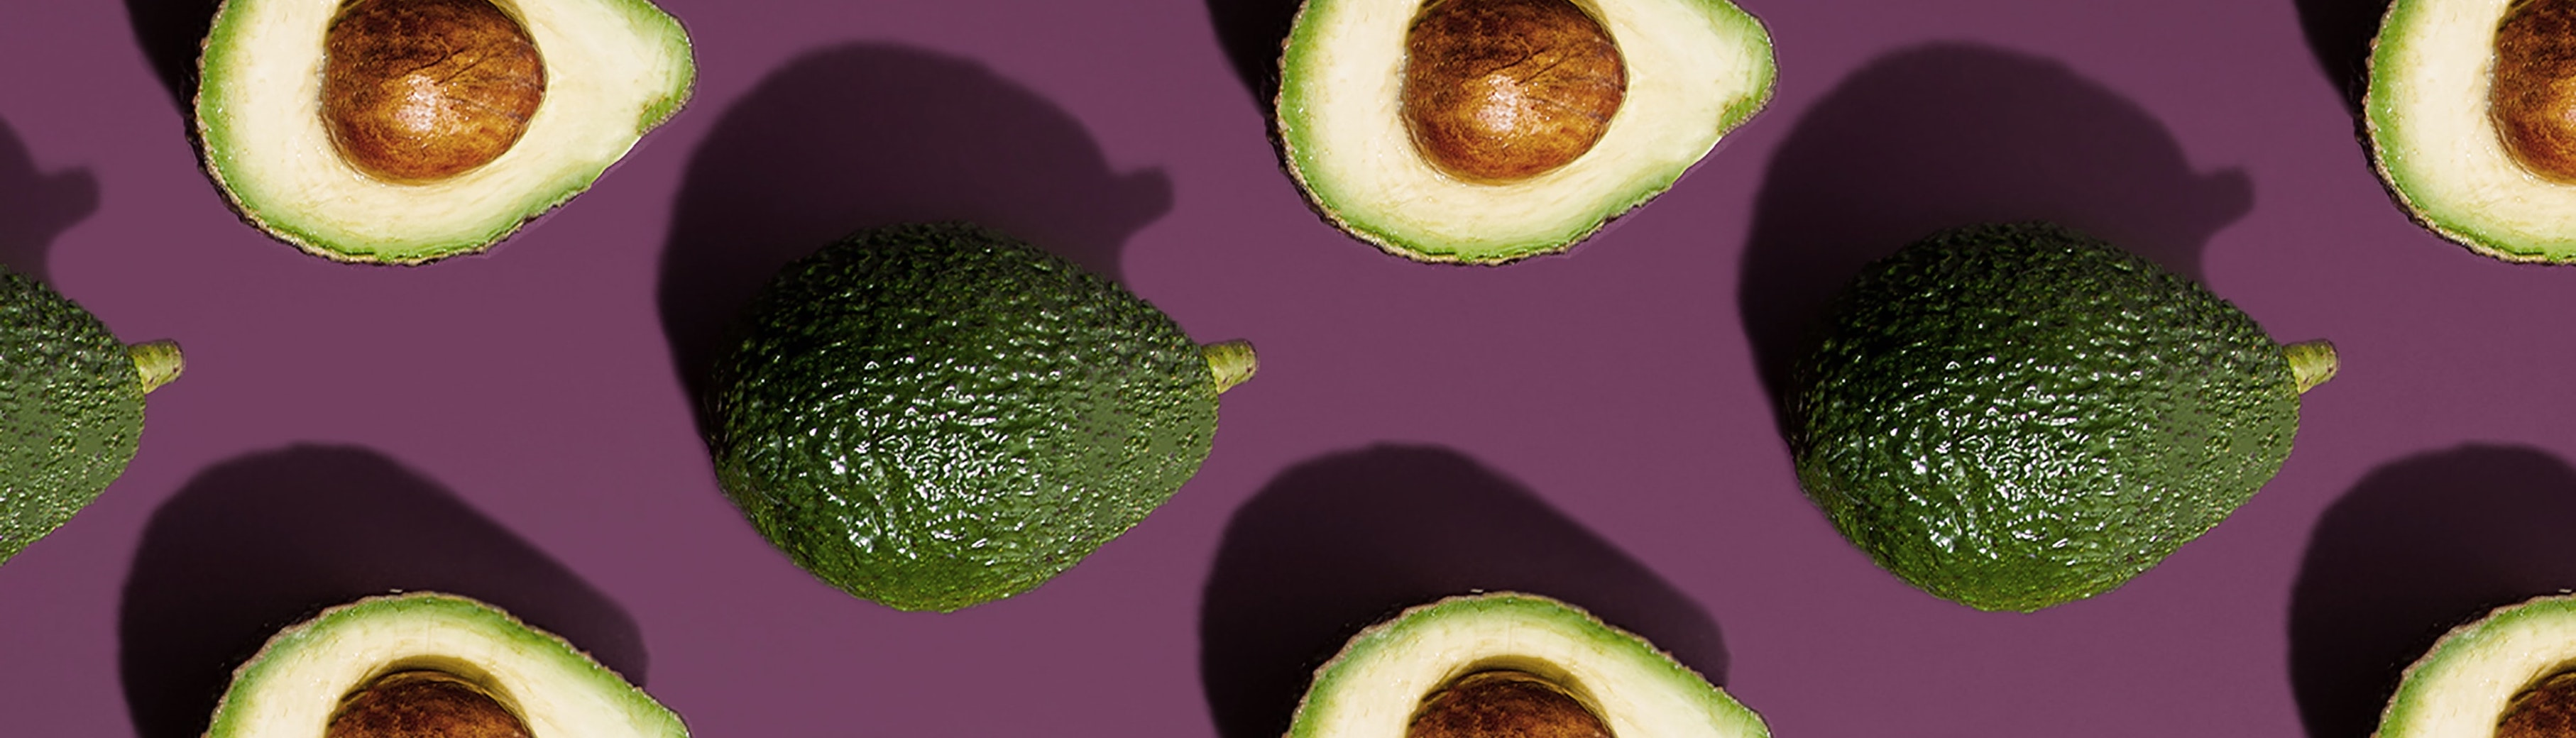

You find yourself in London, crafting a delectable avocado toast, a dish that has risen dramatically in popularity on breakfast menus since the 2010s. This straightforward recipe requires just five ingredients: a ripe avocado, half a lemon, a generous pinch of salt flakes, two slices of sourdough bread, and a good drizzle of extra virgin olive oil. Most of these ingredients are now staples in grocery stores, and as you will find with this project, that is no small feat!

In this project, you'll conduct a supply chain analysis of three ingredients used in avocado toast using the Open Food Facts database. This database contains extensive, openly-sourced information on various foods, including their origins. Through this analysis, you will gain an in-depth understanding of the complex supply chain involved in producing a single dish.

Three pairs of files are provided in the data folder:
- A CSV file for each ingredient, such as `avocado.csv`, with data about each food item and countries of origin.
- A TXT file for each ingredient, such as `relevant_avocado_categories`, containing only the category tags of interest for that food.

Here are some other key points about these files:
- Some of the rows of data in each of the three CSV files do not contain relevant data for your investigation. In each dataset, you will need to filter out rows with irrelevant data, based on values in the `categories_tags` column. Examples of categories are fruits, vegetables, and fruit-based oils. Filter the DataFrame to include only rows where `categories_tags` contains one of the tags in the relevant categories for that ingredient.
- Each row of data usually has multiple category tags in the `categories_tags` column.
There is a column in each CSV file called `origins_tags`, which contains strings for the country of origin of each item.

After completing this project, you'll be armed with a list of ingredients and their countries of origin and be well-positioned to launch into other analyses that explore how long, on average, these ingredients spend at sea.

[Open Food Facts database](https://world.openfoodfacts.org/)

In [1]:
# Import necessary library
import pandas as pd

# Read tab-delimited avocado data
avocado = pd.read_csv('/kaggle/input/whats-in-an-avocado-toast-a-supply-chain-analysis/avocado.csv', sep='\t')

# Subset large DataFrame to include only relevant columns
subset_columns = [ 'code', 'lc', 'product_name_en', 'quantity', 'serving_size', 'packaging_tags', 'brands', 'brands_tags', 'categories_tags', 'labels_tags', 'countries', 'countries_tags', 'origins', 'origins_tags']
avocado = avocado[subset_columns]

# Gather relevant categories data for avocados
with open("/kaggle/input/whats-in-an-avocado-toast-a-supply-chain-analysis/relevant_avocado_categories.txt", "r") as file:
    relevant_avocado_categories = file.read().splitlines()

# Filter avocado data using relevant category tags

# Turn a column of comma-separated tags into a column of lists
avocado['categories_list'] = avocado['categories_tags'].str.split(',')

# Drop rows with null values in a particular column
avocado = avocado.dropna(subset=['categories_list'])

# Filter a DataFrame based on a column of lists
avocado = avocado[avocado['categories_list'].apply(lambda x: any(i in relevant_avocado_categories for i in x))]

# Where do most avocados come from?

# Filter DataFrame for UK data
avocados_uk = avocado[avocado['countries'] == 'United Kingdom']

# Find most common country for avocado origin
avocado_origin = avocados_uk['origins_tags'].value_counts().index[0]
avocado_origin = avocado_origin.lstrip("en:")

# Define a function to read and filter data
def read_and_filter_data(filename, relevant_categories):
    # Read the data
    df = pd.read_csv(filename, sep='\t')

    # Subset DataFrame to include only relevant columns
    subset_columns = [ 'code', 'lc', 'product_name_en', 'quantity', 'serving_size', 'packaging_tags', 'brands', 'brands_tags', 'categories_tags', 'labels_tags', 'countries', 'countries_tags', 'origins', 'origins_tags']
    df = df[subset_columns]

    # Split tags into lists
    df['categories_list'] = df['categories_tags'].str.split(',')

    # Drop rows with null categories data
    df = df.dropna(subset=['categories_list'])

    # Filter data for relevant categories
    df = df[df['categories_list'].apply(lambda x: any(i in relevant_categories for i in x))]

    # Filter data for the UK
    df_uk = df[df['countries'] == 'United Kingdom']

    # Find top origin country string with the highest count
    top_origin_string = df_uk['origins_tags'].value_counts().index[0]

    # Clean up top origin country string
    top_origin_country = top_origin_string.lstrip("en:")
    top_origin_country = top_origin_country.replace('-', ' ')

    print(f'**{filename[:-4]} origins**\n', top_origin_country, '\n')

    # Return the top origin country
    return top_origin_country

# Analyze avocado origins by calling the function
top_avocado_origin = read_and_filter_data('/kaggle/input/whats-in-an-avocado-toast-a-supply-chain-analysis/avocado.csv', relevant_avocado_categories)

# Repeat the process for other ingredients (olive oil and sourdough)

# Gather relevant categories data for olive oil
with open("/kaggle/input/whats-in-an-avocado-toast-a-supply-chain-analysis/relevant_olive_oil_categories.txt", "r") as file:
    relevant_olive_oil_categories = file.read().splitlines()

# Call the function for olive oil
top_olive_oil_origin = read_and_filter_data('/kaggle/input/whats-in-an-avocado-toast-a-supply-chain-analysis/olive_oil.csv', relevant_olive_oil_categories)

# Gather relevant categories data for sourdough
with open("/kaggle/input/whats-in-an-avocado-toast-a-supply-chain-analysis/relevant_sourdough_categories.txt", "r") as file:
    relevant_sourdough_categories = file.read().splitlines()

# Call the function for sourdough
top_sourdough_origin = read_and_filter_data('/kaggle/input/whats-in-an-avocado-toast-a-supply-chain-analysis/sourdough.csv', relevant_sourdough_categories)


**/kaggle/input/whats-in-an-avocado-toast-a-supply-chain-analysis/avocado origins**
 peru 



/tmp/ipykernel_17/4281355936.py:38: DtypeWarning: Columns (0,1,2,4,5,6,7,8,10,13,15,16,17,18,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,38,39,42,43,44,45,46,48,49,50,57,67,70,71,72,73,74,75,76,79,80,81,82,83,86,87,88,89,90,91,92,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,115,121,125,129,133,137,141,145,149,153,157,159,161,165,167,169,177,179,181,183,185,187,189,191,193,195,197,199,201,203,205,211,213,215,217,219,221,223,225,227,229,231,233,235,237,239,241,243,245,247,249,251,253,255,257,259,261,263,265,267,269,271,273,274,275,276,277,278,279,280,281,282,283,284,285,286,288,289,290,291,292,293,294,305,311,312,313,315,316,319,320,321,322,324) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, sep='\t')


**/kaggle/input/whats-in-an-avocado-toast-a-supply-chain-analysis/olive_oil origins**
 greece 

**/kaggle/input/whats-in-an-avocado-toast-a-supply-chain-analysis/sourdough origins**
 united kingdom 

